In [77]:
from __future__ import print_function

import numpy
import pandas

import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection

import keras
print('Keras version %s.' % keras.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

Keras version 2.2.4.


In [78]:
# Загружаем данные
X_full, y_full = sklearn.datasets.load_digits(n_class=10, return_X_y=True)

In [79]:
# Преобразуем таргет в четные/нечетные
y_full = numpy.asarray(list(map(lambda x: x % 2, y_full)))

In [80]:
# Разбиваем набор данных на Train и Test
X, Xt, y, yt = sklearn.model_selection.train_test_split(X_full, y_full, test_size=0.3, random_state=0)

In [81]:
# Преобразуем данные изображений в тензоры
X = X.reshape((X.shape[0], 8, 8, 1))
Xt = Xt.reshape((Xt.shape[0], 8, 8, 1))
print(X.shape, Xt.shape)

(1257, 8, 8, 1) (540, 8, 8, 1)


In [82]:
# Преобразуем данные меток в тензоры
y = keras.utils.to_categorical(y, num_classes=2)
yt = keras.utils.to_categorical(yt, num_classes=2)
print(y.shape, yt.shape)

(1257, 2) (540, 2)


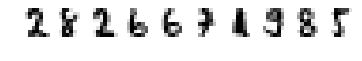

In [83]:
# Посмотрим на картинки глазами
c = 1
for image in Xt[:10]:
    plt.subplot(2, 10, c)
    plt.axis('off')
    plt.imshow(image[:,:,0], cmap=plt.cm.gray_r, interpolation='nearest')
    c += 1
plt.show()

In [84]:
# Описываем модель для классификации цифр
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), input_shape=(8, 8, 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=12, kernel_size=(3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters=10, kernel_size=(1, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation='softmax'))

# Компилируем модель
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 6, 6, 6)           60        
_________________________________________________________________
activation_17 (Activation)   (None, 6, 6, 6)           0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 6)           0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 1, 12)          660       
_________________________________________________________________
activation_18 (Activation)   (None, 1, 1, 12)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 1, 10)          130       
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
__________

In [86]:
# Обучим модель
model.fit(X, y, epochs=10, batch_size=64)

Epoch 1/10
1257/1257 [==============================] - 0s 392us/step - loss: 0.6403 - acc: 0.6269
Epoch 2/10
1257/1257 [==============================] - 0s 123us/step - loss: 0.3655 - acc: 0.8393
Epoch 3/10
1257/1257 [==============================] - 0s 88us/step - loss: 0.2568 - acc: 0.8926
Epoch 4/10
1257/1257 [==============================] - 0s 71us/step - loss: 0.1846 - acc: 0.9340
Epoch 5/10
1257/1257 [==============================] - 0s 86us/step - loss: 0.1565 - acc: 0.9356
Epoch 6/10
1257/1257 [==============================] - 0s 78us/step - loss: 0.1367 - acc: 0.9475
Epoch 7/10
1257/1257 [==============================] - 0s 81us/step - loss: 0.1356 - acc: 0.9451
Epoch 8/10
1257/1257 [==============================] - 0s 76us/step - loss: 0.1132 - acc: 0.9523
Epoch 9/10
1257/1257 [==============================] - 0s 65us/step - loss: 0.0949 - acc: 0.9658
Epoch 10/10
1257/1257 [==============================] - 0s 75us/step - loss: 0.0882 - acc: 0.9682


In [87]:
# Оценим модель на тестовом наборе
score = model.evaluate(Xt, yt)
print('Test loss: %.4f, acc: %.4f\n' % tuple(score))

pred = model.predict(Xt)
print("Confusion matrix:\n%s" % sklearn.metrics.confusion_matrix(numpy.argmax(yt, axis=1), numpy.argmax(pred, axis=1)))

540/540 [==============================] - 0s 215us/step
Test loss: 0.1161, acc: 0.9481

Confusion matrix:
[[246  21]
 [  7 266]]
